# Collecting Guides in `gggrid()`

The `guides` parameter controls how legends and colorbars are handled when arranging plots in a grid.

**`guides='auto'`** (default)  
Keep guides in subplots by default. However, if this grid is nested inside another grid that uses `guides='collect'`, pass the guides up for collection at that higher level.

**`guides='collect'`**  
Collect all guides (legends and colorbars) from subplots and place them alongside the grid figure, automatically removing duplicates.

**`guides='keep'`**  
Keep guides in their original subplots. No collection occurs at this level, even if an outer grid requests collection.

#### Duplicate Detection

Guides are compared by their visual appearance:

**For legends:**  
Two legends are considered duplicates if they have identical 
- title
- labels
- all aesthetic values (colors, shapes, sizes, line types, etc.)

**For colorbars:**  
Two colorbars are considered duplicates if they have identical 
- title
- domain limits
- breaks (tick positions)
- color gradient

Note: Colorbars from different data ranges typically have different limits and will not merge without manual harmonization.

In [1]:
from lets_plot import *
import pandas as pd


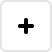
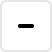
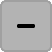
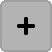
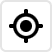
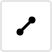
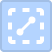
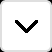
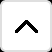
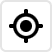
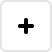
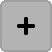
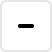
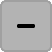
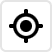
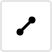
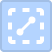
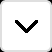
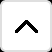
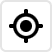

In [2]:
LetsPlot.setup_html()

In [3]:
diamonds = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/diamonds.csv")
print(diamonds.shape)
diamonds = diamonds.sample(1_000, random_state=42).reset_index(drop=True)
print(diamonds.shape)
diamonds.head()

(53940, 10)
(1000, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
1,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
2,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
3,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
4,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


#### 1. Collecting Legends

In [4]:

# Create three plots that share the same color aesthetic ('clarity')
clarity_p = ggplot(diamonds, aes(y='price', color='clarity')) + scale_color_hue() + theme_classic() + theme(axis_ticks_length=-5)

clarity_p0 = clarity_p + geom_point(aes(x='carat'))
clarity_p1 = clarity_p + geom_point(aes(x='depth'))
clarity_p2 = clarity_p + geom_point(aes(x='color'))

# By default, each plot keeps its own legend.
gggrid([
    clarity_p0, 
    clarity_p1,
    clarity_p2
])

In [5]:
# Now collect the legends into a single shared legend.

# Note: 
# All 3 legends are visually identical (same title, labels, and aesthetic values), 
# so duplicates are removed and only one legend is shown.

gggrid([
    clarity_p0, 
    clarity_p1 + theme(axis_title_y='blank'),
    clarity_p2 + theme(axis_title_y='blank')
  ],
       
  guides='collect'                   # <-- collect legends from subplots
       
) + theme(legend_position='bottom')  # <-- also adjust the legend position 

#### 2. Collecting Colorbars

In [6]:
ideal_diamonds = diamonds[diamonds['cut'] == 'Ideal']
fair_diamonds = diamonds[diamonds['cut'] == 'Fair']

price_p = (ggplot(mapping=aes('carat', 'depth', color='price')) 
           + scale_color_viridis() 
           + theme_grey()
           + theme(plot_title=element_text(hjust=0.5))
          )
price_p0 = price_p + geom_point(data=ideal_diamonds, size=6) + ggtitle('Ideal Cut')
price_p1 = price_p + geom_point(data=fair_diamonds, size=6) + ggtitle('Fair Cut')

# Arrange two plots in a grid with guides='collect'.

# Note: 
# The colorbars have different domain limits and breaks (due to different data ranges),
# so both are retained as separate colorbars.

gggrid([
    price_p0, 
    price_p1, 
], 
    sharex=True, sharey=True,
    guides='collect'
)

In [7]:
# Apply the same color scale limits to both subplots.
# Now both colorbars are visually identical, so the duplicate is removed.

price_min = min(ideal_diamonds['price'].min(), fair_diamonds['price'].min())
price_max = max(ideal_diamonds['price'].max(), fair_diamonds['price'].max())

price_lims = scale_color_viridis(limits=[price_min, price_max])
gggrid([
    price_p0 + price_lims, 
    price_p1 + price_lims, 
], 
    sharex=True, sharey=True,
    guides='collect'
)

#### 3. Collecting Guides in Nested Grids

In [8]:
# Create nested grids and collect all guides at the top level.

clarity_grid = gggrid([
    clarity_p0, 
    clarity_p1, 
    clarity_p2
])
price_grid = gggrid([
    price_p0 + price_lims, 
    price_p1 + price_lims, 
])


gggrid([
    clarity_grid, 
    price_grid
],
    ncol=1,
    guides='collect'  # <-- collects from all nested grids
       
) + theme(legend_position='bottom') + ggsize(800, 600)


In [9]:
# A nested grid can override this behavior by collecting guides at its own level,
# keeping them separate from guides collected by the upper level.

clarity_grid_1 = gggrid([
        clarity_p0, 
        clarity_p1, 
        clarity_p2
    ], 
                        
    guides='collect'  # <-- collect 'clarity' legends at this level
)

gggrid([
    clarity_grid_1, 
    price_grid
],
    ncol=1,
    guides='collect'
       
) + theme(legend_position='bottom') + ggsize(800, 600)
